# Devanagari Handwritten Characters Recognition: Creating A Classifier


## Introduction
This has been more than a year i did this project and i have already written a blog about it on medium, and my personal blogs also. Looking back to those algorithms i applied on that project makes me still fell proud about it but if i looked over the codes, then i have to step back. Those codes were totally messy and i am thinking of improving the code and entire system. Then i will add a new feature to this project. I will add a Web App.

>Devanagari is the national font of Nepal and is used widely throughout the India also. It contains 10 numerals(०, १, २, ३, ४, ५, ६, ७, ८, ९) and 36 consonants (क, ख, ग, घ, ङ, च, छ, ज, झ, ञ, ट, ठ, ड, ढ, ण, त, थ, द, ध,न, प,फ, ब, भ, म, य, र, ल, व, श, ष, स, ह, क्ष, त्र, ज्ञ). 

Some consonants are complex and made by combine some other. However, throughout this project i considered them as single character.

### Motivation
This project was done by me on early 2019 but i had a plan of doing it on 2018 then to complete our academic project of BSc.CSIT, i did it. 

### Credits
I would like to give huge credits to the authors of dataset and of course my friends with whom i defended this project.

### How?
The classifier model i used initially was trained on Google Colab, but now for writing of this blog, i am doing it on my own laptop because i am lacking internet access. **Using Colab is always a great idea.**


## Dataset Preparation
We could create own version of dataset but why to take lot time rather than working with already collected dataset. The format of image was Grayscale with 2 pixels margin on each side. I didn’t knew that much about ‘Image Datagenerator’ of Keras then so I converted all the image files to CSV file with first column as label and remaining 1024 as pixel values. But now I am using ImageDatagenerators.
    
The required dataset is publicly available on the <a href="https://web.archive.org/web/20160307001701/http:/cvresearchnepal.com/wordpress/dhcd/" rel="noreferrer noopener" target="_blank">link.</a> Huge credit goes to the team who collected the dataset and made it public.

Please download the datset from above link and extract them under your current working directory.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

tf.__version__

'1.15.0'

In [10]:
S = 32 # imnput shape of our model 

# rescale our images
trainDatagen = ImageDataGenerator(rescale=1./255)

testDatagen = ImageDataGenerator(rescale=
                                 1./255)
# minor image processing
train_set = trainDatagen.flow_from_directory(
        'Train/Train/',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_set = testDatagen.flow_from_directory(
        'Test/Test',
        target_size=(S, S),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')


Found 77613 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


### View some of images
The structure of train_set is like (num_batches, image/label, example).

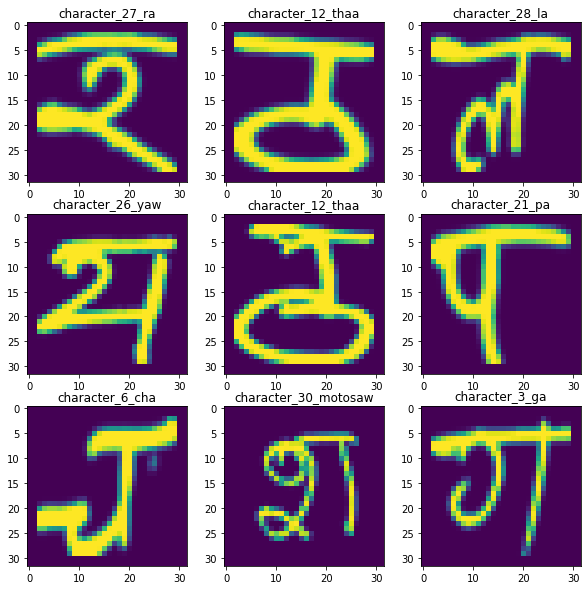

In [45]:
classes = list(train_set.class_indices.keys())
r=3
c=3
fig = plt.figure(figsize=(10, 10))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = train_set[i][1][i]
    img = train_set[i][0][i]
    plt.title(classes[np.argmax(lbl)])
    plt.imshow(img.reshape(32, 32))
plt.show()

## Model Preparation
For a classifier model, we will be using a CNN. If you are new to CNN then i have written another blog about this topic. Please follow below.
* CNN from scratch
* Convolution

### Import Dependencies

In [47]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.models import model_from_json
# from tensorflow.keras.models import load_model

### Make a CNN Sequential Model
There are many advantages of using CNN and one of popular is parameter sharing and reuse. This means instead of using a parameters = number of nodes on layer, CNN uses a fixed sized small filter. And our task is to find the best filter that can classify our characters with maximum accuracy.

In [54]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

### Compile Model
Using ADAM has many advantages and one of them is learning rate decay. Our dataset is converted into Categorical and hence the softmax activation function will perform better along with categorical loss. If you are interested on knowing more about optimizers, then i have written a blog about [how to write popular ML Optimizers from scratch]().

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train It
Easy peasy. Just make sure step per epoch must be used equal to or smaller than the length of train_set.

In [56]:
#Evaluate the model, 
import time
time1 = time.time()
history = model.fit_generator(train_set, steps_per_epoch=len(train_set),
                           epochs=10,
                           workers = 4,
                           validation_data=test_set,
                           validation_steps=10,
                           verbose = 1)
time2 = time.time()
score = model.evaluate_generator(test_set, steps=1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Epoch 1/10
2426/2426 [==============================] - 437s 180ms/step - loss: 0.7719 - acc: 0.7795 - val_loss: 0.0807 - val_acc: 0.9750
Epoch 2/10
2426/2426 [==============================] - 322s 133ms/step - loss: 0.2443 - acc: 0.9250 - val_loss: 0.0725 - val_acc: 0.9844
Epoch 3/10
2426/2426 [==============================] - 363s 150ms/step - loss: 0.1789 - acc: 0.9453 - val_loss: 0.0476 - val_acc: 0.9906
Epoch 4/10
2426/2426 [==============================] - 364s 150ms/step - loss: 0.1482 - acc: 0.9540 - val_loss: 0.0414 - val_acc: 0.9844
Epoch 5/10
2426/2426 [==============================] - 378s 156ms/step - loss: 0.1261 - acc: 0.9614 - val_loss: 0.0431 - val_acc: 0.9844
Epoch 6/10
2426/2426 [==============================] - 366s 151ms/step - loss: 0.1117 - acc: 0.9655 - val_loss: 0.0279 - val_acc: 0.9937
Epoch 7/10
2426/2426 [==============================] - 362s 149ms/step - loss: 0.1016 - acc: 0.9691 - val_loss: 0.0232 - val_acc: 0.9937
Epoch 8/10
2426/2426 [============

Using ADAM on CNN with Categorical loss, the model seems to get great performance i.e. 99.06 accuracy on 3rd epoch.

### Visualize the model training

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


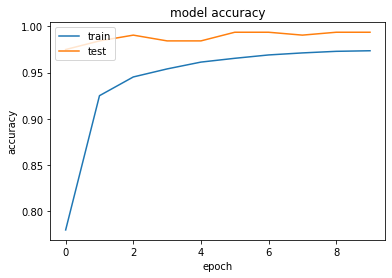

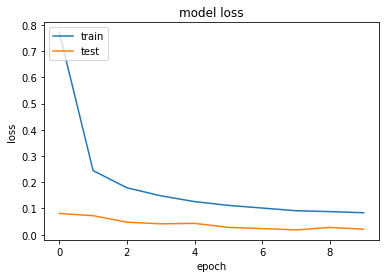

In [57]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save It
We will be using our model later to do character classification. So we must save it.

In [60]:
# Lets save our model 

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model


model_json = model.to_json()

with open("dcr.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("dcr.h5")

### Load It
Check if loading works.

In [61]:
# load json and create model
json_file = open('dcr.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dcr.h5")
print("Loaded model from disk")

loaded_model.save('dcr.hdf5')
loaded_model=load_model('dcr.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


Now lets check if our loaded model performs as it did on test set earlier on training.

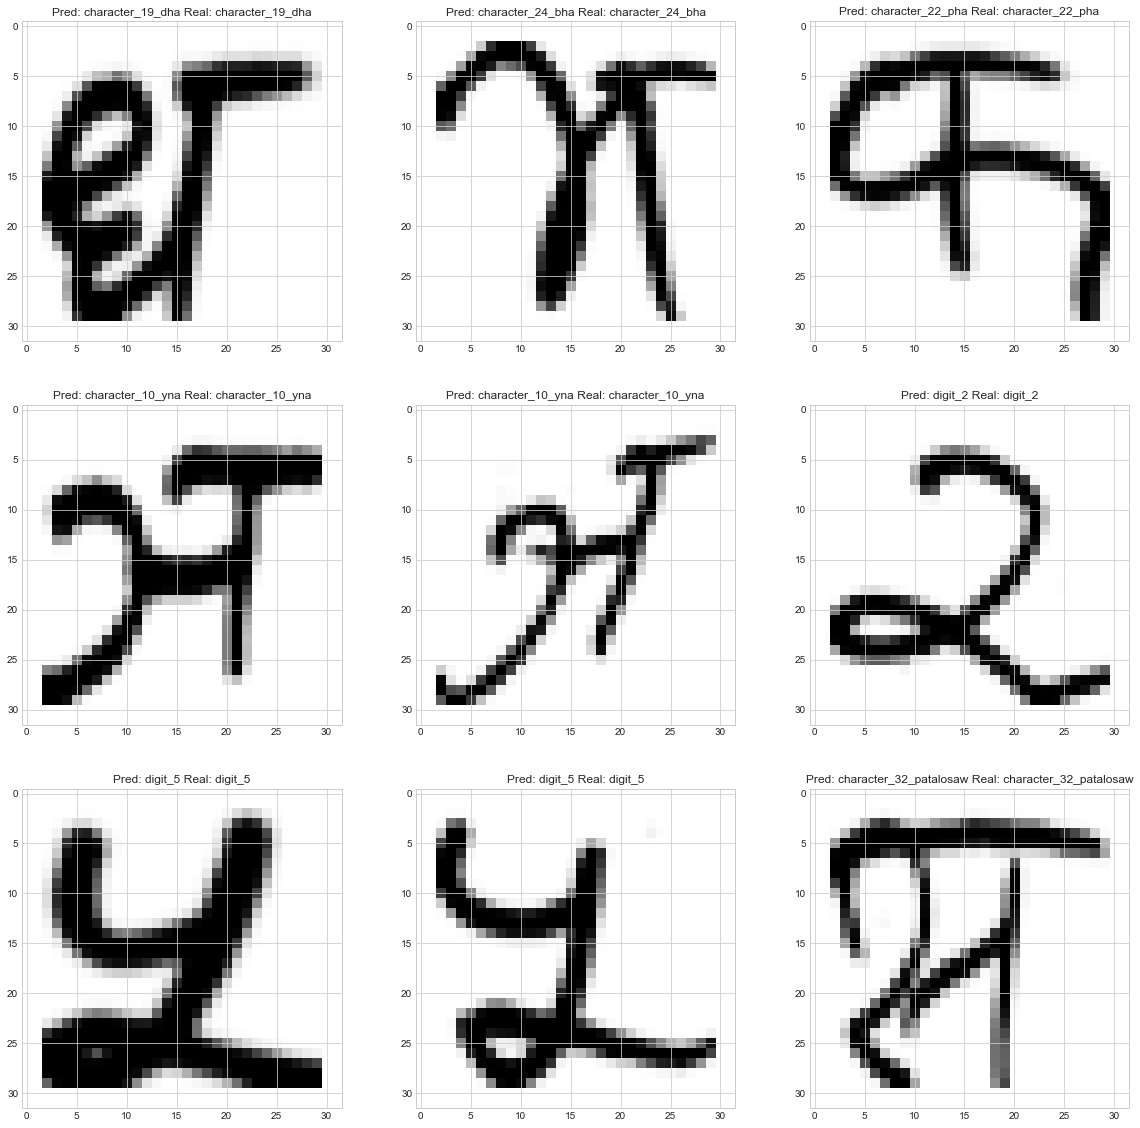

In [63]:
plt.style.use('seaborn-whitegrid')
r=3
c=3
fig = plt.figure(figsize=(20, 20))
for i in range(r*c):
    plt.subplot(r, c, i+1)
    lbl = test_set[i][1][i]
    img = test_set[i][0][i]
    img = img.reshape(1, S, S, 1)
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    title = f"Pred: {classes[prediction]} Real: {classes[np.argmax(lbl)]}"
    plt.title(title)
    plt.imshow(img.reshape(32, 32))
plt.show()


Seems model is doing alright. I don't have any intentions to do other evaluations right now. So i am heading over to next step.

## What next?
Well this was just a begining part about training a simple classifier but on next blog i will be writing about cropping a text from image. In the meantime you can check my other blogs.
